In [1]:
import matplotlib.pyplot as plt

In [34]:
import pandas as pd
import numpy as np

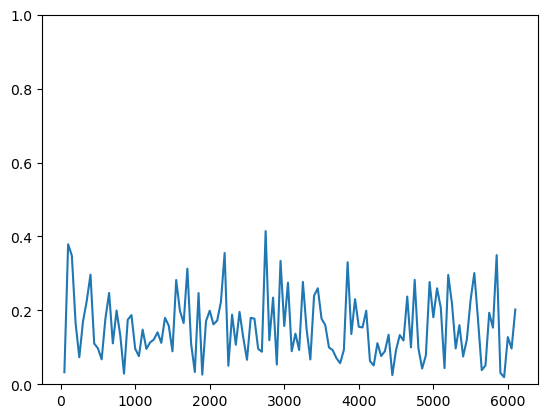

,lr-AdamW,created_at,train/loss_simple_step,train/loss_vlb_step,train/loss_step,train/loss_emb_reg_step,global_step,epoch,val/loss_simple,val/loss_vlb,val/loss,val/loss_emb_reg,val/loss_simple_ema,val/loss_vlb_ema,val/loss_ema,val/loss_emb_reg_ema,train/loss_simple_epoch,train/loss_vlb_epoch,train/loss_epoch,train/loss_emb_reg_epoch
1,NaN,2022-12-07 00:35:43.320973,0.032645,0.000129,0.033276,0.063137,49.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2022-12-07 00:36:33.192679,0.378917,0.021726,0.379124,0.020769,99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2022-12-07 00:37:22.632059,0.348235,0.002677,0.348612,0.037657,149.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2022-12-07 00:38:12.222043,0.166273,0.001145,0.166671,0.039875,199.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,2022-12-07 00:39:01.681632,0.073020,0.000259,0.073324,0.030411,249.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# metric_file = "/home/sarahchen/textual_inversion/logs/woman_occupation2022-12-04T09-56-24_test_run/testtube/version_0/metrics.csv"
# metric_file = "/home/sarahchen/textual_inversion/logs/woman_occupation22022-12-06T20-29-52_test_run/testtube/version_0/metrics.csv"
# metric_file = "/home/sarahchen/textual_inversion/logs/woman_doctor2022-12-03T22-02-26_test_run/testtube/version_0/metrics.csv"
metric_file = "/home/sarahchen/textual_inversion/logs/woman_occupation32022-12-07T00-34-16_test_run/testtube/version_0/metrics.csv"


df = pd.read_csv(metric_file)
cur_df = df[~pd.isnull(df["train/loss_step"])]

plt.plot(
    cur_df['global_step'].values,
    cur_df['train/loss_simple_step'].values
)
plt.ylim((0, 1))
plt.show()
cur_df.head()

In [58]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


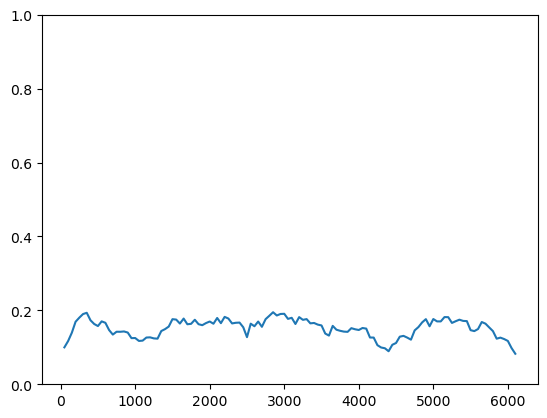

In [60]:

smoothed_loss = smooth(cur_df['train/loss_simple_step'].values, 10)

# ^ from https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way

plt.plot(
    cur_df['global_step'].values,
    smoothed_loss
)
plt.ylim((0, 1))
plt.show()